<a href="https://colab.research.google.com/github/xgpojegarcete/proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: armar un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias escolares
materias = [
    "Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales",
    "Educación Física", "Inglés", "Física", "Química", "Biología", "Arte", "Música",
    "Tecnología", "Informática", "Filosofía", "Sociología", "Educación cívica"
]

# Lista de apellidos y nombres (puedes agregar más)
apellidos = ["Gómez", "Rodríguez", "López", "Fernández", "García", "Martínez", "Pérez", "González", "Sánchez", "Romero"]
nombres = ["Juan", "Ana", "Carlos", "Laura", "Diego", "María", "Pedro", "Sofía", "Luis", "Marta"]


# Crear una lista vacía para almacenar los datos del dataframe
data = []

# Generar 100 filas de datos aleatorios
for _ in range(100):
  apellido = random.choice(apellidos)
  nombre = random.choice(nombres)
  nro_dni = random.randint(10000000, 99999999)  # DNI ficticio
  materia = random.choice(materias)
  nota_1er_trimestre = random.randint(1, 10)
  nota_2do_trimestre = random.randint(1, 10)
  nota_3er_trimestre = random.randint(1, 10)
  faltas = random.randint(0, 20)
  data.append([apellido, nombre, nro_dni, materia, nota_1er_trimestre, nota_2do_trimestre, nota_3er_trimestre, faltas])

# Crear el dataframe
df = pd.DataFrame(data, columns=["Apellido", "Nombre", "Nro_DNI", "Materia Escolar", "Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre", "Faltas a clases"])


df

,Apellido,Nombre,Nro_DNI,Materia Escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,Gómez,Laura,22175437,Sociología,6,8,10,17
1,Rodríguez,Sofía,64204952,Arte,9,1,8,11
2,Romero,Diego,70224536,Arte,10,7,3,13
3,López,Pedro,91149977,Educación Física,3,3,9,17
4,García,Juan,96460569,Historia,3,6,2,10
...,...,...,...,...,...,...,...,...
95,Rodríguez,Marta,98160041,Inglés,7,4,3,0
96,Pérez,María,61374007,Educación Física,9,1,1,0
97,Martínez,Sofía,46830861,Geografía,4,7,4,15
98,Martínez,Marta,81612775,Tecnología,8,9,3,14


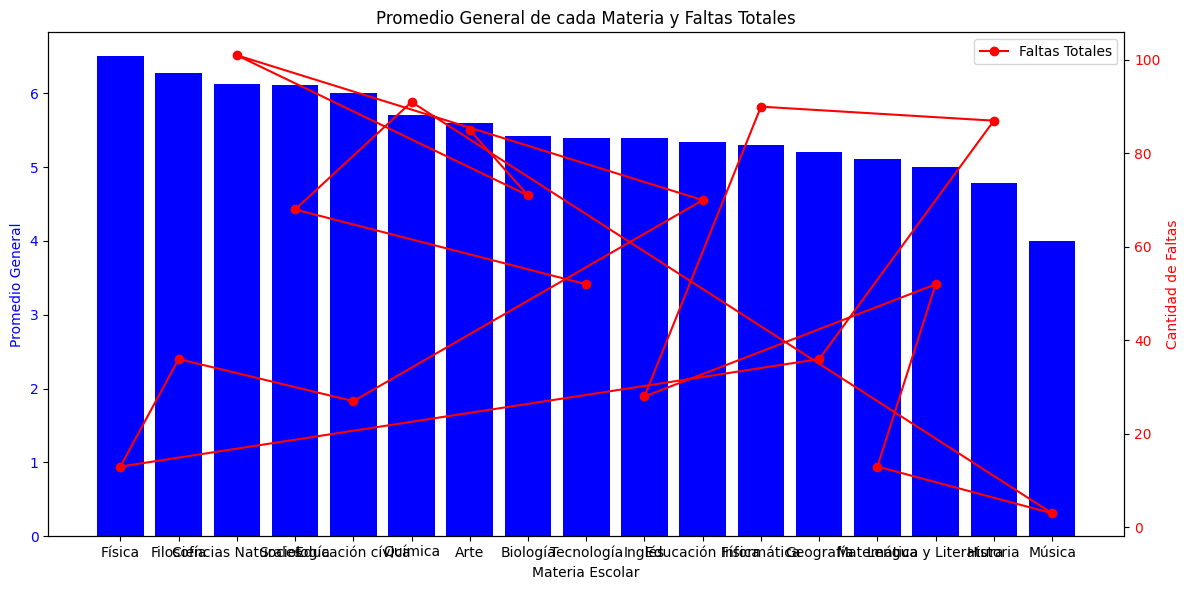

In [2]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor contrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt
import pandas as pd

# Calcular el promedio general de cada materia
promedio_materias = df.groupby('Materia Escolar')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)

# Ordenar las materias por promedio de mayor a menor
promedio_materias_ordenado = promedio_materias.sort_values(ascending=False)

# Calcular la cantidad total de faltas por materia
faltas_materias = df.groupby('Materia Escolar')['Faltas a clases'].sum()

# Crear el gráfico de barras
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barras para el promedio general de cada materia
ax1.bar(promedio_materias_ordenado.index, promedio_materias_ordenado.values, color='blue')
ax1.set_xlabel('Materia Escolar')
ax1.set_ylabel('Promedio General', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Promedio General de cada Materia y Faltas Totales')

# Agregar un segundo eje Y para las faltas
ax2 = ax1.twinx()
ax2.plot(faltas_materias.index, faltas_materias.values, color='red', marker='o')
ax2.set_ylabel('Cantidad de Faltas', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Rotar las etiquetas del eje X para mejor visualización
plt.xticks(rotation=45, ha='right')

# Agregar leyenda
plt.legend(['Faltas Totales', 'Promedio General'], loc='upper right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [3]:
df.to_csv("datos_alumnos.csv", index=False)